In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time, math

In [1]:
filename = "WSAS17.txt"

In [4]:
data = pd.read_json(filename)
data['address'] = pd.io.json.json_normalize(data[:]['message'])['address']
data['value'] = pd.io.json.json_normalize(data[:]['message'])['args']
data['value'] = data['value'].str[0]
data = data.drop(columns=['message'])
data['time'] = data['time']-data['time'][0]

In [5]:
data

,time,address,value
0,0,/spr_beta_alpha,0.853686
1,10,/spr_alpha_theta,0.559041
2,1201,/td_front_back,1.052575
3,3566,/spr_beta_alpha,0.170725
4,3570,/spr_alpha_theta,0.356346
5,4179,/fp_wpli_left_midline,0.023098
6,4181,/fp_wpli_left_lateral,0.012596
7,4182,/fp_wpli_right_midline,0.043409
8,4183,/fp_wpli_right_lateral,0.019802
9,4365,/td_front_back,0.959953


In [6]:
channels = [
    '/fp_dpli_left_midline',
    '/fp_dpli_left_lateral',
    '/fp_dpli_right_midline', 
    '/fp_dpli_right_lateral',
    '/fp_wpli_left_midline', 
    '/fp_wpli_left_lateral', 
    '/fp_wpli_right_midline', 
    '/fp_wpli_right_lateral', 
    '/hl_relative_position',
    '/pe_frontal', 
    '/pe_parietal', 
    '/pac_rpt_frontal', 
    '/pac_rpt_parietal', 
    '/spr_beta_alpha', 
    '/spr_alpha_theta', 
    '/td_front_back']

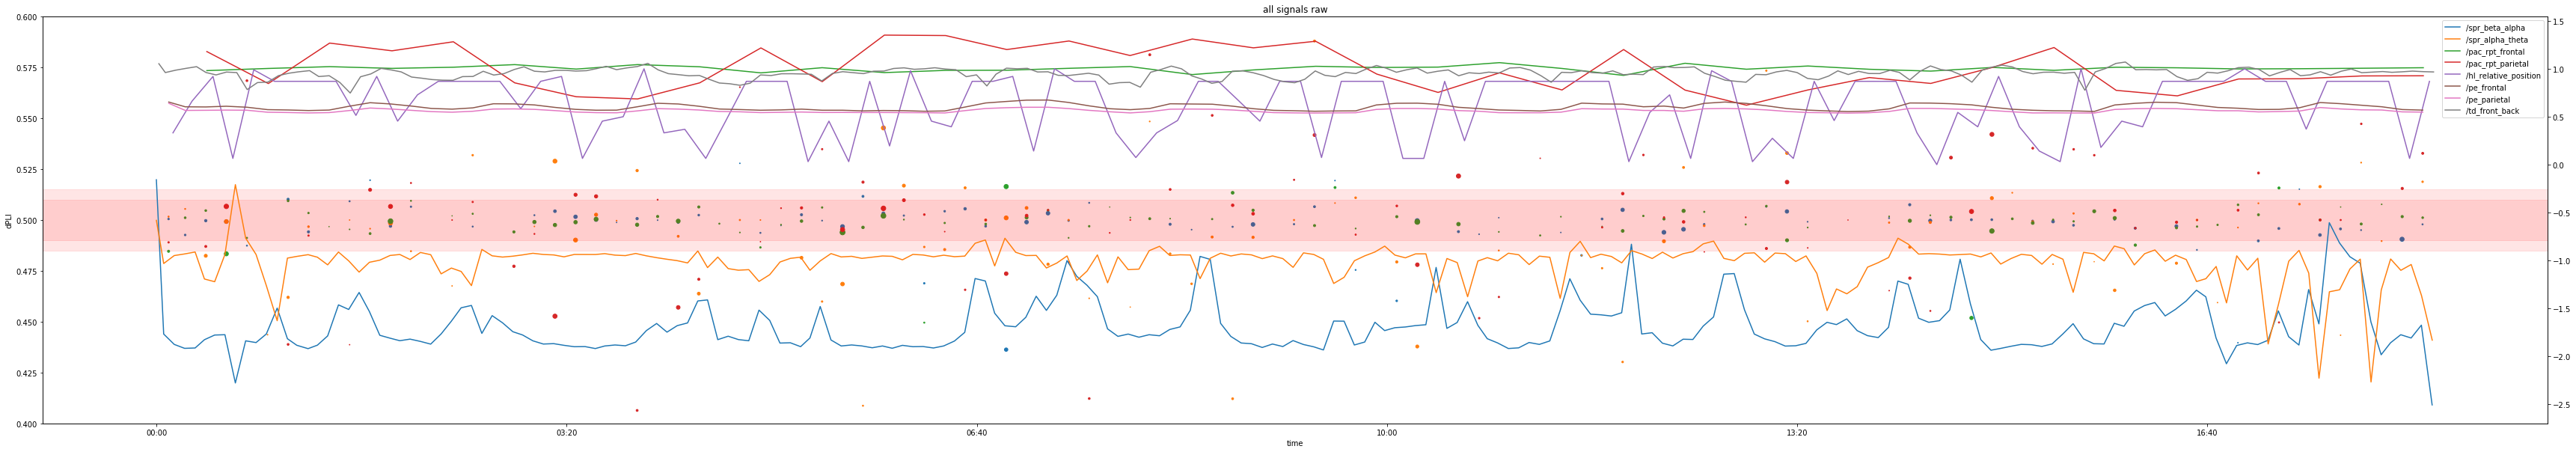

In [8]:
fig, ax = plt.subplots(figsize=(60,10))

ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.ymin = 0.4
plt.ymax = 0.6
ax.set_ylabel('dPLI')
ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('all signals raw')

ax2 = ax.twinx()

ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], np.log(data.loc[data['address'] == channels[13]]['value']), label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], np.log(data.loc[data['address'] == channels[14]]['value']), label=channels[14])
#ba = plt.plot(data.loc[data['address'] == channels[13]]['time']), np.log(data.loc[data['address'] == channels[13]]['value']), label=channels[13])
#at = plt.plot(data.loc[data['address'] == channels[14]]['time']), np.log(data.loc[data['address'] == channels[14]]['value']), label=channels[14])
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])


formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

handles, labels = ax2.get_legend_handles_labels()
ax.legend(handles, labels)

In [14]:
filename = "WSAS13-jan23.txt"
data13 = pd.read_json(filename)
data13['address'] = pd.io.json.json_normalize(data13[:]['message'])['address']
data13['value'] = pd.io.json.json_normalize(data13[:]['message'])['args']
data13['value'] = data13['value'].str[0]
data13 = data13.drop(columns=['message'])
data13['time'] = data13['time']-data13['time'][0]

filename = "WSAS15-jan23.txt"
data15 = pd.read_json(filename)
data15['address'] = pd.io.json.json_normalize(data15[:]['message'])['address']
data15['value'] = pd.io.json.json_normalize(data15[:]['message'])['args']
data15['value'] = data15['value'].str[0]
data15 = data15.drop(columns=['message'])
data15['time'] = data15['time']-data15['time'][0]

filename = "WSAS16-crash.txt"
data16 = pd.read_json(filename)
data16['address'] = pd.io.json.json_normalize(data16[:]['message'])['address']
data16['value'] = pd.io.json.json_normalize(data16[:]['message'])['args']
data16['value'] = data16['value'].str[0]
data16 = data16.drop(columns=['message'])
data16['time'] = data16['time']-data16['time'][0]

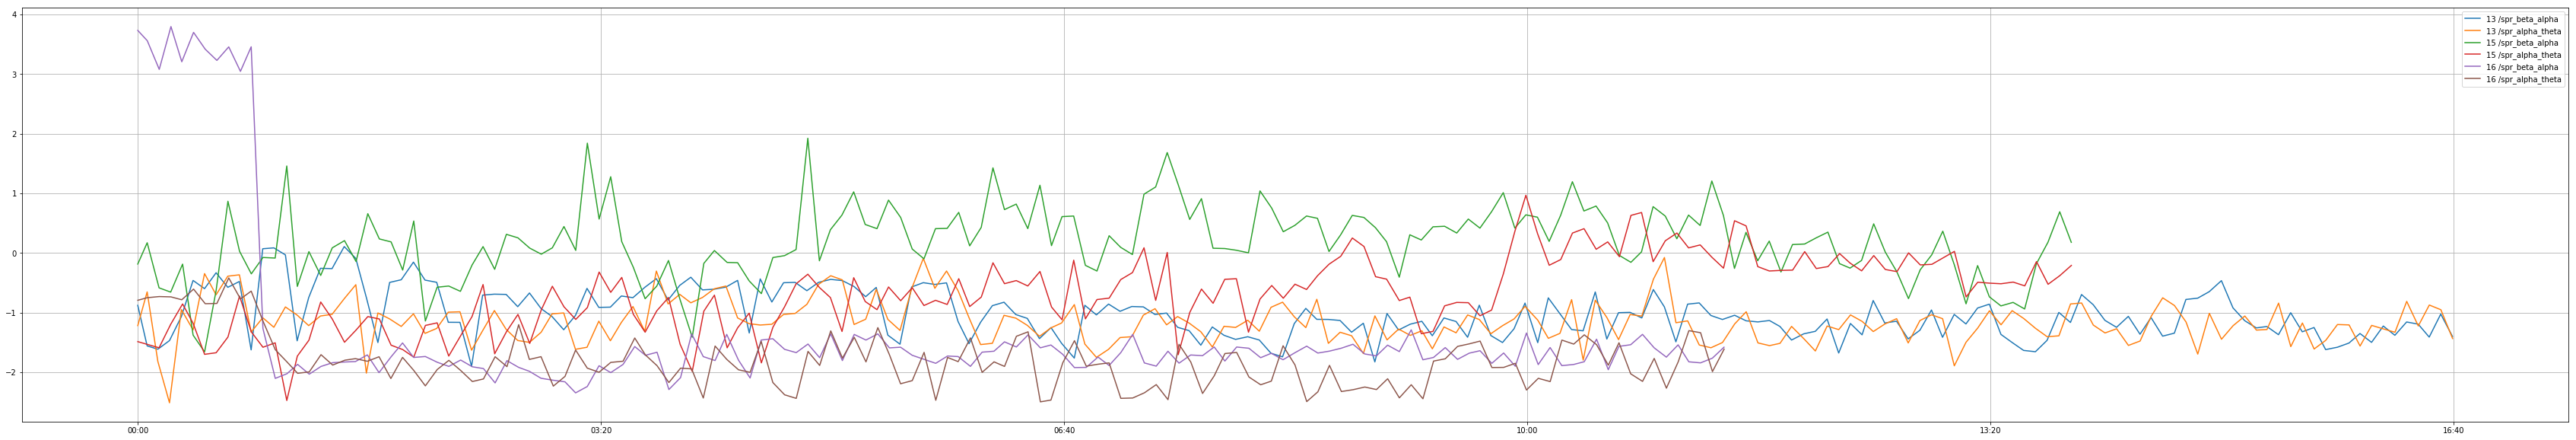

In [30]:
fig, ax = plt.subplots(figsize=(60,10))
plt.grid(True)

# ax.set(ylim=(0.4, 0.6))
# lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
#             s=data.loc[data['address'] == channels[4]]['value']*200)
# ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
#             s=data.loc[data['address'] == channels[5]]['value']*200)
# rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
#             s=data.loc[data['address'] == channels[6]]['value']*200)
# rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
#             s=data.loc[data['address'] == channels[7]]['value']*200)
# plt.ymin = 0.4
# plt.ymax = 0.6
# ax.set_ylabel('dPLI')
# ax.set_xlabel('time')

# plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
# plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
# plt.title('all signals raw')


ba13 = plt.plot(data13.loc[data13['address'] == channels[13]]['time'], np.log(data13.loc[data13['address'] == channels[13]]['value']), label='13 ' + channels[13])
at13 = plt.plot(data13.loc[data13['address'] == channels[14]]['time'], np.log(data13.loc[data13['address'] == channels[14]]['value']), label='13 ' + channels[14])
ba15 = plt.plot(data15.loc[data15['address'] == channels[13]]['time'], np.log(data15.loc[data15['address'] == channels[13]]['value']), label='15 ' + channels[13])
at15 = plt.plot(data15.loc[data15['address'] == channels[14]]['time'], np.log(data15.loc[data15['address'] == channels[14]]['value']), label='15 ' + channels[14])
ba16 = plt.plot(data16.loc[data16['address'] == channels[13]]['time'], np.log(data16.loc[data16['address'] == channels[13]]['value']), label='16 ' + channels[13])
at16 = plt.plot(data16.loc[data16['address'] == channels[14]]['time'], np.log(data16.loc[data16['address'] == channels[14]]['value']), label='16 ' + channels[14])
#ba = plt.plot(data.loc[data['address'] == channels[13]]['time']), np.log(data.loc[data['address'] == channels[13]]['value']), label=channels[13])
#at = plt.plot(data.loc[data['address'] == channels[14]]['time']), np.log(data.loc[data['address'] == channels[14]]['value']), label=channels[14])
# pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
# pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
# hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
# pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
# pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
# td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])


formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


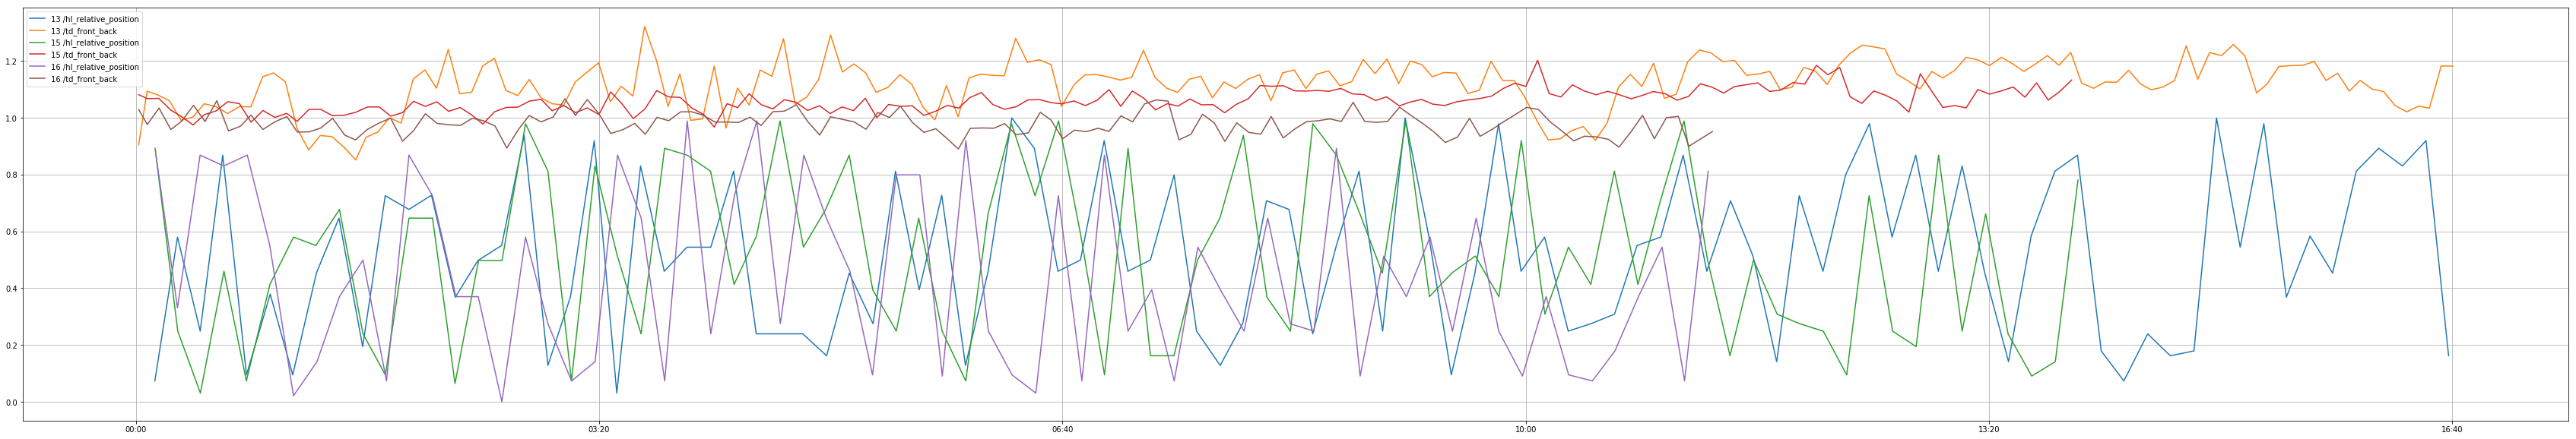

In [27]:
fig, ax = plt.subplots(figsize=(60,10))
plt.grid(True)

# ax.set(ylim=(0.4, 0.6))
# lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
#             s=data.loc[data['address'] == channels[4]]['value']*200)
# ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
#             s=data.loc[data['address'] == channels[5]]['value']*200)
# rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
#             s=data.loc[data['address'] == channels[6]]['value']*200)
# rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
#             s=data.loc[data['address'] == channels[7]]['value']*200)
# plt.ymin = 0.4
# plt.ymax = 0.6
# ax.set_ylabel('dPLI')
# ax.set_xlabel('time')

# plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
# plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
# plt.title('all signals raw')


ba13 = plt.plot(data13.loc[data13['address'] == channels[8]]['time'], data13.loc[data13['address'] == channels[8]]['value'], label='13 ' + channels[8])
at13 = plt.plot(data13.loc[data13['address'] == channels[15]]['time'], data13.loc[data13['address'] == channels[15]]['value'], label='13 ' + channels[15])
ba15 = plt.plot(data15.loc[data15['address'] == channels[8]]['time'], data15.loc[data15['address'] == channels[8]]['value'], label='15 ' + channels[8])
at15 = plt.plot(data15.loc[data15['address'] == channels[15]]['time'], data15.loc[data15['address'] == channels[15]]['value'], label='15 ' + channels[15])
ba16 = plt.plot(data16.loc[data16['address'] == channels[8]]['time'], data16.loc[data16['address'] == channels[8]]['value'], label='16 ' + channels[8])
at16 = plt.plot(data16.loc[data16['address'] == channels[15]]['time'], data16.loc[data16['address'] == channels[15]]['value'], label='16 ' + channels[15])
#ba = plt.plot(data.loc[data['address'] == channels[13]]['time']), np.log(data.loc[data['address'] == channels[13]]['value']), label=channels[13])
#at = plt.plot(data.loc[data['address'] == channels[14]]['time']), np.log(data.loc[data['address'] == channels[14]]['value']), label=channels[14])
# pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
# pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
# hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
# pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
# pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
# td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])


formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

handles, labels = ax2.get_legend_handles_labels()
ax.legend(handles, labels)

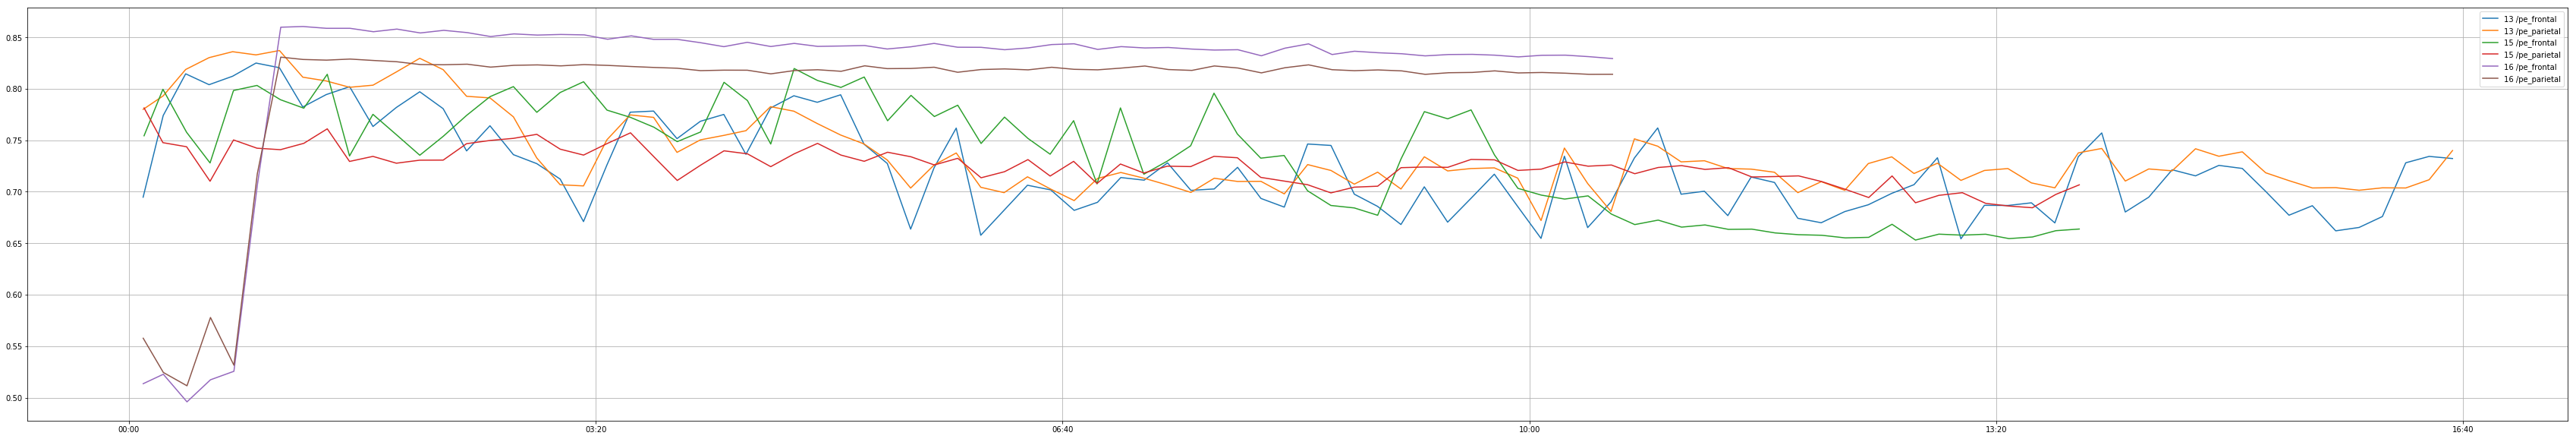

In [32]:
fig, ax = plt.subplots(figsize=(60,10))
plt.grid(True)

# ax.set(ylim=(0.4, 0.6))
# lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
#             s=data.loc[data['address'] == channels[4]]['value']*200)
# ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
#             s=data.loc[data['address'] == channels[5]]['value']*200)
# rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
#             s=data.loc[data['address'] == channels[6]]['value']*200)
# rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
#             s=data.loc[data['address'] == channels[7]]['value']*200)
# plt.ymin = 0.4
# plt.ymax = 0.6
# ax.set_ylabel('dPLI')
# ax.set_xlabel('time')

# plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
# plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
# plt.title('all signals raw')


ba13 = plt.plot(data13.loc[data13['address'] == channels[9]]['time'], data13.loc[data13['address'] == channels[9]]['value'], label='13 ' + channels[9])
at13 = plt.plot(data13.loc[data13['address'] == channels[10]]['time'], data13.loc[data13['address'] == channels[10]]['value'], label='13 ' + channels[10])
ba15 = plt.plot(data15.loc[data15['address'] == channels[9]]['time'], data15.loc[data15['address'] == channels[9]]['value'], label='15 ' + channels[9])
at15 = plt.plot(data15.loc[data15['address'] == channels[10]]['time'], data15.loc[data15['address'] == channels[10]]['value'], label='15 ' + channels[10])
ba16 = plt.plot(data16.loc[data16['address'] == channels[9]]['time'], data16.loc[data16['address'] == channels[9]]['value'], label='16 ' + channels[9])
at16 = plt.plot(data16.loc[data16['address'] == channels[10]]['time'], data16.loc[data16['address'] == channels[10]]['value'], label='16 ' + channels[10])
#ba = plt.plot(data.loc[data['address'] == channels[13]]['time']), np.log(data.loc[data['address'] == channels[13]]['value']), label=channels[13])
#at = plt.plot(data.loc[data['address'] == channels[14]]['time']), np.log(data.loc[data['address'] == channels[14]]['value']), label=channels[14])
# pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
# pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
# hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
# pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
# pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
# td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])


formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)